## <p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SALES PRODUCT DATA ANALYSIS</p>

Working with sales data plays a crucial role in the commercial success of any company. Whether that means understanding current sales or forecasting future sales. Generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Evaluating the performance of sales team against its goals, provides insights about the top performing and underperforming products or services, the problems in selling and market opportunities and sales activities that generate revenue.

## About the Data Set

* `Order ID`: An Order ID is the number system that Amazon uses exclusively to keep track of orders. 

* `Product`: The product that have been sold.

* `Quantity Ordered`: Ttotal item quantity ordered in the initial order.

* `Price Each`: The price of each product.

* `Order Date`: This is the date the customer is requesting the order to be shipped.

* `Purchase Address`: The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases. (A shipping date, billing address, shipping address, and the request items, quantities and price)

<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LIST OF CONTENTS</p>   

    
* [1. Import Libraries](#1)
    
* [2. Loading the Data](#2)
    
* [3. Data Cleaning](#3)
    
* [4. Feature Engineering](#4)
    
* [5. Exploratory Data Analysis](#5)
    
* [6. Conclusions](#6)
    
* [7. Recommendations](#7)

<a id="1"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORT LIBRARIES</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

    
<a id="2"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING THE DATA</p>

In [2]:
# Create a list of all month data
files = [file for file in os.listdir('data')] 
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
# DataFrame
all_months_data = pd.DataFrame()
# loop for concat the data
for file in files:
    data = pd.read_csv("data/" + file)
    all_months_data = pd.concat([all_months_data, data])
# export all data to csv    
all_months_data.to_csv("all_months_data.csv", index=False)

In [4]:
sales = pd.read_csv('all_months_data.csv') # read data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


<a id="3"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

## Fixing column headers

In [6]:
sales['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [7]:
sales[sales['Quantity Ordered'] == 'Quantity Ordered'].sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
125780,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
123251,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
163351,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
174912,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
83746,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
47513,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
160481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
164713,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
99007,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
indexes = sales[sales['Quantity Ordered'] == 'Quantity Ordered'].index
indexes

Int64Index([   254,    705,   1101,   2875,   3708,   3793,   3812,   4218,
              5143,   5293,
            ...
            179246, 180955, 181479, 182134, 182146, 183671, 184012, 184041,
            184275, 186532],
           dtype='int64', length=355)

In [9]:
sales = sales.drop(indexes)
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Missing Values

In [11]:
sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
sales = sales.dropna()
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


## Fixing Data Types

In [13]:
sales['Quantity Ordered'] = sales['Quantity Ordered'].astype('int')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.9+ MB


In [14]:
sales['Price Each'] = sales['Price Each'].astype('float')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [15]:
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


## Categorical Variables

In [16]:
categorical_columns = sales.select_dtypes(['object']).columns
categorical_columns

Index(['Order ID', 'Product', 'Purchase Address'], dtype='object')

In [17]:
for col in categorical_columns:
    print('{}: {} unique values'.format(col, sales[col].nunique()))

Order ID: 178437 unique values
Product: 19 unique values
Purchase Address: 140787 unique values


In [18]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


<a id="4"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">FEATURE ENGINEERING</p>

## Sales

In [19]:
sales['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [20]:
sales['Sales'] = sales['Quantity Ordered'] * sales['Price Each']
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95


## Year, Month, Hour, Minute, Day of month, and Day name

In [21]:
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month
sales['Hour'] = sales['Order Date'].dt.hour 
sales['Minute'] = sales['Order Date'].dt.minute 
sales['Day_Month'] = sales['Order Date'].dt.day 
sales['Day_Name'] = sales['Order Date'].dt.day_name()

In [22]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Day_Month,Day_Name
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,0,1,30,Monday
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,7,3,29,Sunday
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,18,21,12,Thursday
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,15,13,22,Sunday
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,12,38,18,Wednesday


In [23]:
order = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
sales['Day_Name'] = pd.Categorical(sales['Day_Name'], categories=order, ordered=True)
sales['Day_Name'].dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

## City and State

In [24]:
def city(address):
        return address.split(',')[1]
    
def state(address):
        return address.split(',')[2].split(' ')[1]

In [25]:
sales['City'] = sales['Purchase Address'].apply(lambda x: f"{city(x)}")
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Day_Month,Day_Name,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,0,1,30,Monday,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,7,3,29,Sunday,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,18,21,12,Thursday,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,15,13,22,Sunday,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,12,38,18,Wednesday,Atlanta


In [26]:
sales['State'] = sales['Purchase Address'].apply(lambda x: f"{state(x)}")
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Day_Month,Day_Name,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,0,1,30,Monday,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,7,3,29,Sunday,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,18,21,12,Thursday,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,15,13,22,Sunday,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,12,38,18,Wednesday,Atlanta,GA


In [27]:
sales['City'].value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: City, dtype: int64

In [28]:
sales['State'].value_counts()

CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
WA    14732
OR    10010
ME     2455
Name: State, dtype: int64

## Limiting the data to 2019

In [29]:
sales['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [30]:
sales[sales['Year'] == 2020]['Order Date'].min(), sales[sales['Year'] == 2020]['Order Date'].max()

(Timestamp('2020-01-01 00:10:00'), Timestamp('2020-01-01 05:13:00'))

**Observation:**

> In order to maintain consistency in the data it will be better if we focus on 2019 sales. 2020 is limited to 1 month data, then will not be relevant for the analysis.

In [31]:
sales_cleaned = sales[sales['Year'] == 2019]
sales_cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Year,Month,Hour,Minute,Day_Month,Day_Name,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,2019,12,0,1,30,Monday,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,2019,12,7,3,29,Sunday,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,2019,12,18,21,12,Thursday,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,2019,12,15,13,22,Sunday,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,2019,12,12,38,18,Wednesday,Atlanta,GA


In [32]:
sales_cleaned['Year'].value_counts()

2019    185916
Name: Year, dtype: int64

In [33]:
sales_cleaned['Year'] = sales_cleaned['Year'].astype('object')
sales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 186849
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  object        
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int64         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Purchase Address  185916 non-null  object        
 6   Sales             185916 non-null  float64       
 7   Year              185916 non-null  object        
 8   Month             185916 non-null  int64         
 9   Hour              185916 non-null  int64         
 10  Minute            185916 non-null  int64         
 11  Day_Month         185916 non-null  int64         
 12  Day_Name          185916 non-null  category      
 13  City              185916 non-null  object        
 14  Stat

# Fixing Duplicates

In [34]:
sales_cleaned.duplicated().sum()

264

In [35]:
sales_cleaned = sales_cleaned.drop_duplicates()
sales_cleaned.duplicated().sum()

0

In [36]:
sales_cleaned.to_csv('all_months_data_cleaned.csv')

<a id="5"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS</p>

# Distributions

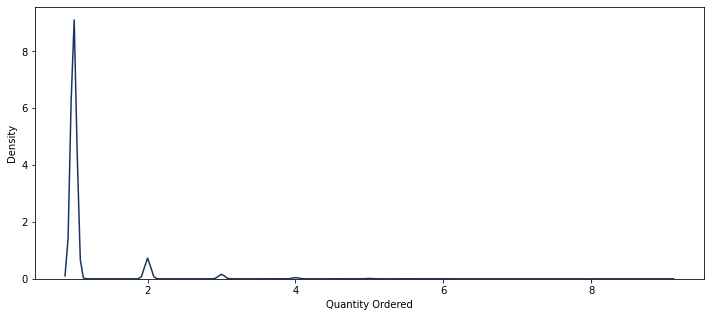

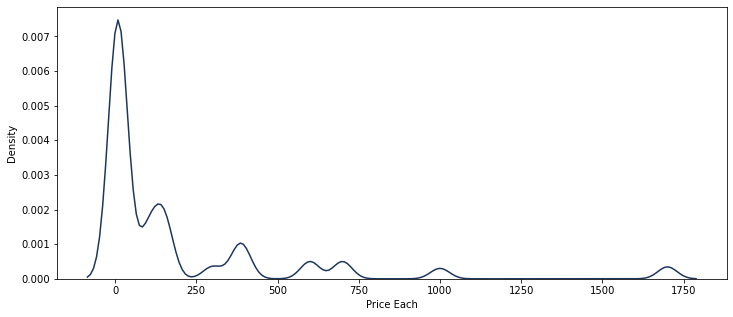

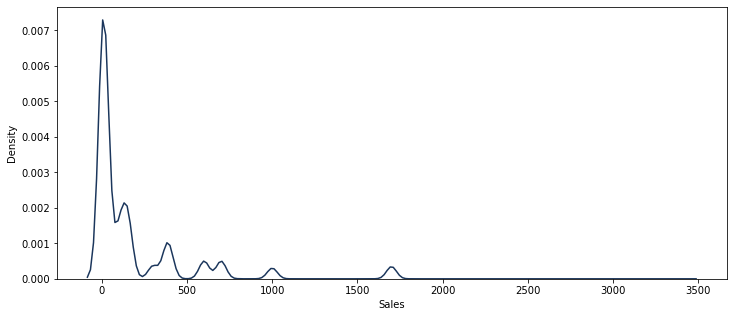

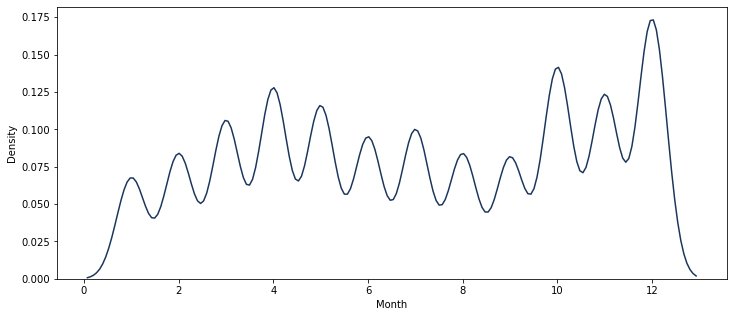

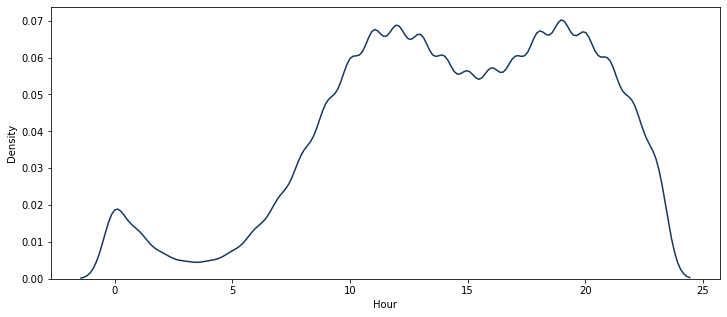

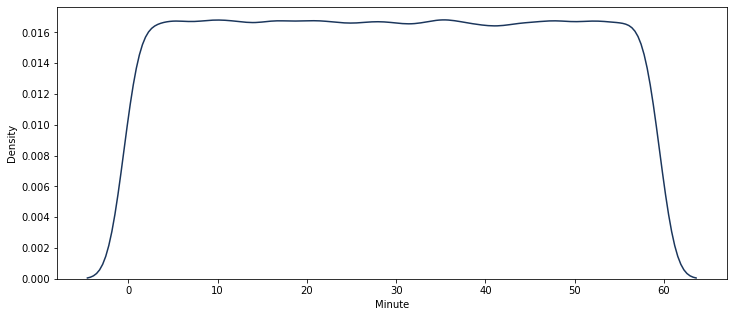

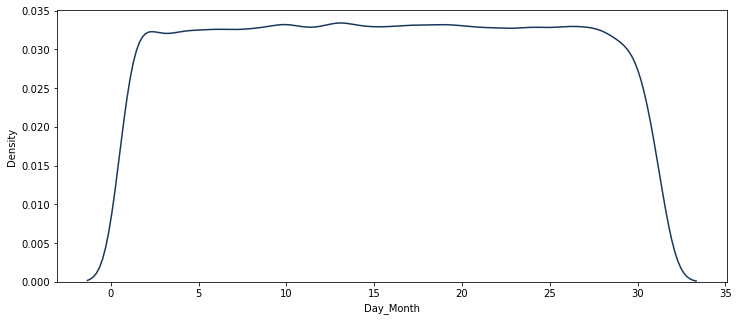

In [37]:
num_columns = sales_cleaned.select_dtypes(['float64', 'int64']).columns

for col in num_columns:
    plt.figure(figsize=(12,5))
    sns.kdeplot(x=col, data=sales, color='#1B365C')
    plt.show()

**Observation:**

> Most of the quantity ordered are 1. A few customer buy 2 ot 4 in one order, more than 4 products is very rare. 

> Price can vary from 2.99 to 500 usd. 

**Let's explore outliers in the data.**

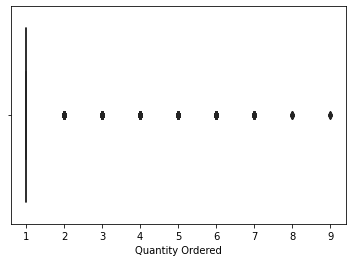

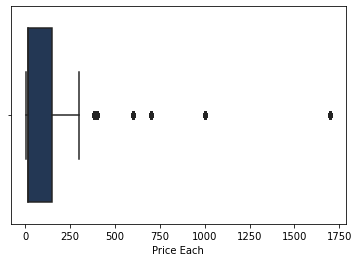

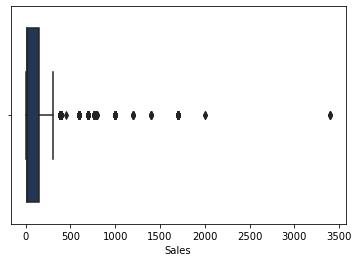

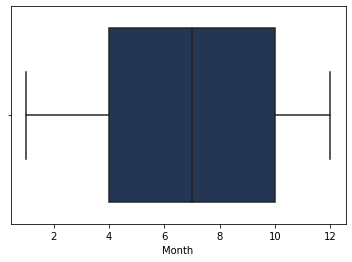

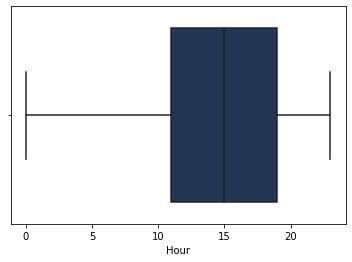

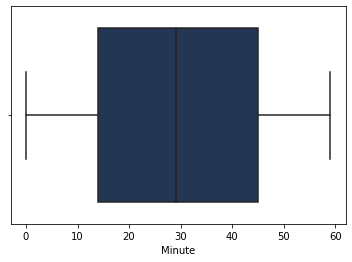

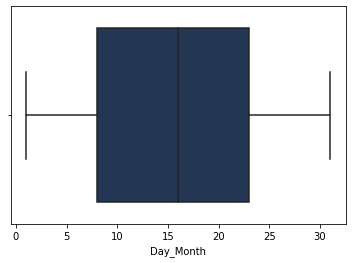

In [38]:
for col in num_columns:
    sns.boxplot(data=sales, x=col, orient='h', color='#1B365C')
    plt.show()

**Observation:**
 > It's important to answer the question: `What products are most often sold together?`. Then removing, changing, etc., outliers with any method, like IQR, may not be a good idea.

# Aswering key questions

## 1. What was the best Year for sales? How much was earned that Year?

Note that the question may not be answered because of limited data in 2020. This year only has data about january.

In [39]:
sales.groupby(['Year', 'Month'], as_index=False)['Sales'].sum()

,Year,Month,Sales
0,2019,1,1813586.44
1,2019,2,2202022.42
2,2019,3,2807100.38
3,2019,4,3390670.24
4,2019,5,3152606.75
5,2019,6,2577802.26
6,2019,7,2647775.76
7,2019,8,2244467.88
8,2019,9,2097560.13
9,2019,10,3736726.88


In [40]:
sales.groupby('Year')['Sales'].sum()

Year
2019    34483365.68
2020        8670.29
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

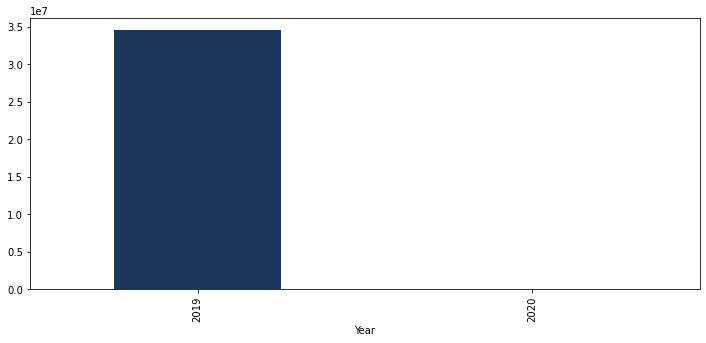

In [41]:
sales.groupby('Year')['Sales'].sum().plot(kind='bar', figsize=(12,5), color='#1B365C')

**Observation:**
> In 2019, total sales were `34483365.68`.

## 2. When were the best and worst selling periods?

**Let's see the big picture.**

In [42]:
sales_cleaned['Date'] = sales_cleaned['Order Date'].dt.date

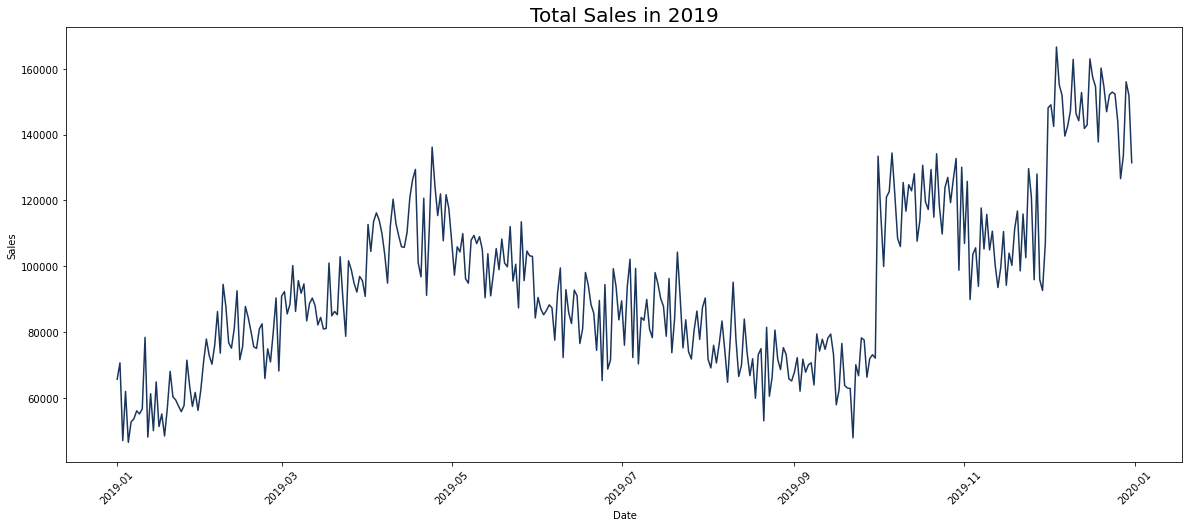

In [43]:
sales_date = sales_cleaned.groupby('Date', as_index=False)['Sales'].sum()
plt.figure(figsize=(20, 8))
sns.lineplot(x='Date', y='Sales', data=sales_date, color='#1B365C')
plt.xticks(rotation=45)
plt.title('Total Sales in 2019', size=20)
plt.show()

**Observation:**

> Interesting! The fourth quarter `Q4` months were the month with most sales. **(October, November, December)**

> The worst periods of sales were `Q1` **(January, February, March)** and `Q3` **(July, August, September)**.

## 3. What was the best month for sales? How much was earned that month?


In [44]:
map = {
            1: 'January',
            2: 'February',
            3: 'March',
            4: 'April',
            5: 'May',
            6: 'June',
            7: 'July',
            8: 'August',
            9: 'September', 
            10: 'October',
            11: 'November',
            12: 'December'
}
sales_cleaned['Month_name'] = sales_cleaned['Month'].map(map)
order = ["January","February","March", "April", "May", "June", "July", "August", "September", "October", "November", "December"] 
sales_cleaned['Month_name'] = pd.Categorical(sales_cleaned['Month_name'], categories=order, ordered=True)
sales_cleaned['Month_name'].dtype

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True)

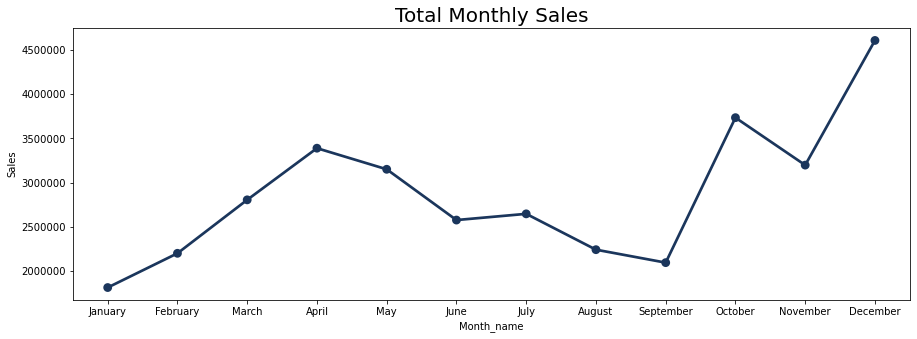

In [69]:
monthly_sales = sales_cleaned.groupby('Month_name', as_index=False)['Sales'].sum()
plt.figure(figsize=(15, 5))
sns.pointplot(x='Month_name', y='Sales', data=monthly_sales, color='#1B365C')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Monthly Sales', size=20)
plt.show()

In [46]:
monthly_sales[monthly_sales['Month_name'] == 'December']

,Month_name,Sales
11,December,4608295.7


**Observation:**

> The month with most sales was December and the total amount of sales is `4608295.7`.

> Note that from October the sales increases to December.

**Let's explore on days of the week.**

### 3.1. Exploring further, sales by day and day of month.


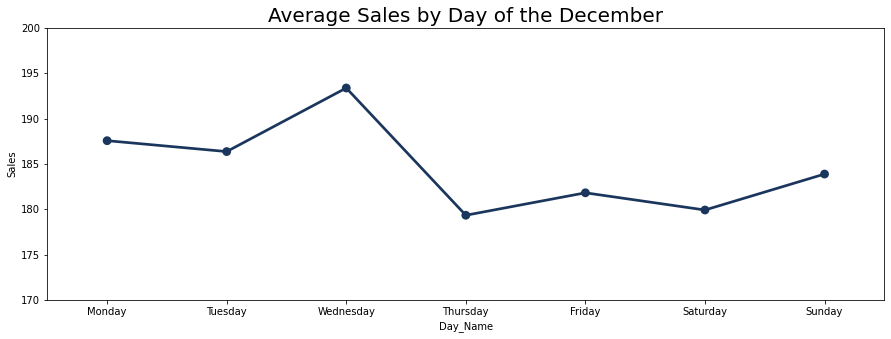

In [47]:
december_sales = sales_cleaned[sales_cleaned['Month_name'] == 'December']
december_day_name = december_sales.groupby('Day_Name', as_index=False)['Sales'].mean()
plt.figure(figsize=(15, 5))
sns.pointplot(x='Day_Name', y='Sales', data=december_day_name, color='#1B365C')
plt.title('Average Sales by Day of the December', size=20)
plt.ylim(170, 200)
plt.show()

**Observation**

> There is a clear trend where from `Thursdays` to `Saturday` sales decreases. However, on December, from `Sunday` to `Wednesday` sales tend to increase. 

**Is it the case in general? Let's explore...**

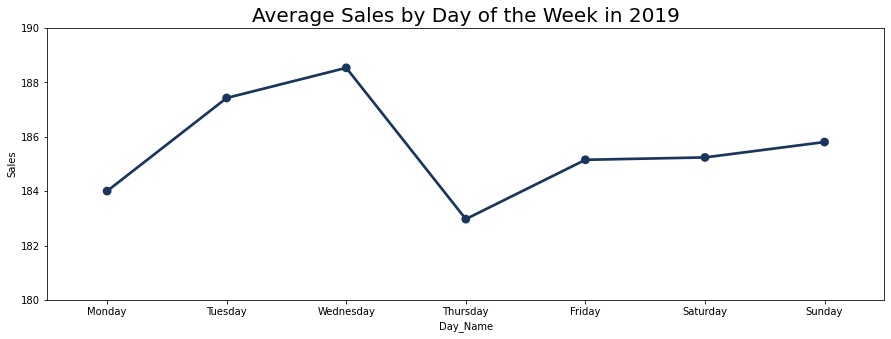

In [48]:
sales_cleaned.groupby('Day_Name', as_index=False)['Sales'].mean()
plt.figure(figsize=(15, 5))
sns.pointplot(x='Day_Name', y='Sales', data=sales_cleaned.groupby('Day_Name', as_index=False)['Sales'].mean(), color='#1B365C')
plt.title('Average Sales by Day of the Week in 2019', size=20)
plt.ylim(180, 190)
plt.show()

**Observation**

> In general, from `Tuesday` to `Wednesday` sales tend to increase, but it is not a lot.  

**What about days of month?**

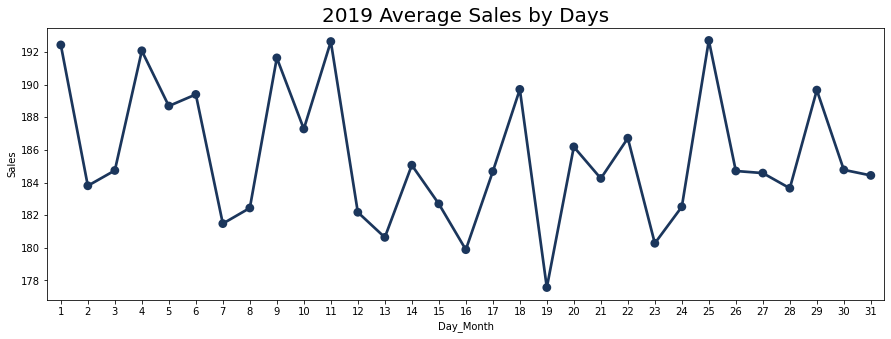

In [49]:
plt.figure(figsize=(15, 5))
sns.pointplot(x='Day_Month', y='Sales', data=sales_cleaned.groupby('Day_Month', as_index=False)['Sales'].mean(), color='#1B365C')
plt.title('2019 Average Sales by Days', size=20)
plt.show()

**Observation**
> Unfortunately there is no clear trend on monthly days.

## 4. What was the average sales per month? 

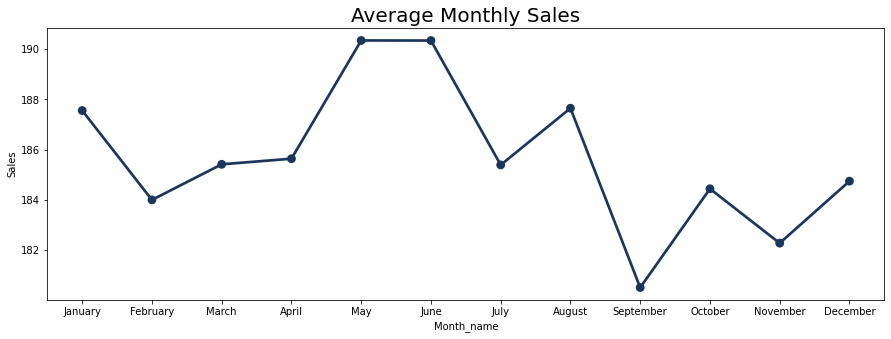

In [68]:
avg_monthly_sales = sales_cleaned.groupby('Month_name', as_index=False)['Sales'].mean()
plt.figure(figsize=(15, 5))
sns.pointplot(x='Month_name', y='Sales', data=avg_monthly_sales, color='#1B365C')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Average Monthly Sales', size=20)
plt.show()

**Observation:**

> We can see that clearly the months with the highest average in sales are: `May` and `June`.


## 5. What City had the highest number of sales?

In [50]:
city_state_sales = sales_cleaned.groupby(['City', 'State'], as_index=False)['Sales'].sum().sort_values('Sales', ascending=True)
city_state_sales['city_state'] = city_state_sales['City'] + " - " + city_state_sales['State']
city_state_sales

,City,State,Sales,city_state
6,Portland,ME,449321.38,Portland - ME
1,Austin,TX,1817544.35,Austin - TX
7,Portland,OR,1869857.57,Portland - OR
9,Seattle,WA,2744896.03,Seattle - WA
3,Dallas,TX,2763659.01,Dallas - TX
0,Atlanta,GA,2794199.07,Atlanta - GA
2,Boston,MA,3657300.76,Boston - MA
5,New York City,NY,4660526.52,New York City - NY
4,Los Angeles,CA,5447304.29,Los Angeles - CA
8,San Francisco,CA,8252258.67,San Francisco - CA


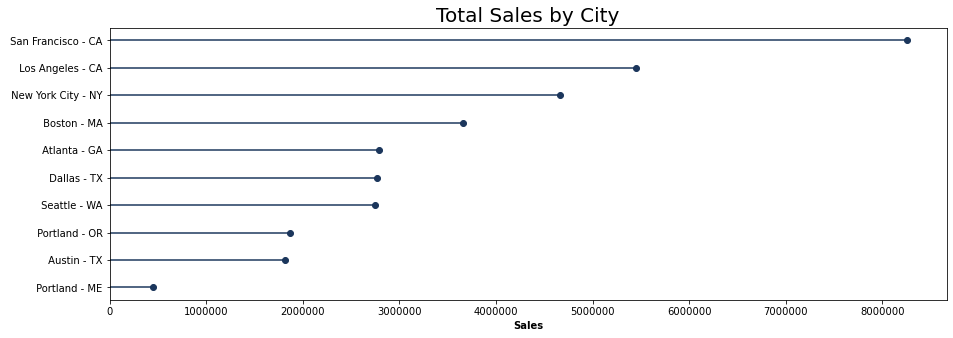

In [51]:
fig, axes = plt.subplots(figsize=(15,5))
axes.hlines(city_state_sales['city_state'], xmin=1,
            xmax=city_state_sales['Sales'], color='#1B365C')

axes.plot(city_state_sales['Sales'], city_state_sales['city_state'], "o", color='#1B365C')
axes.set_xlim(0)
plt.xlabel('Sales', weight="bold")
plt.ylabel('')
plt.title('Total Sales by City', size=20)
plt.ticklabel_format(style='plain', axis='x')
# plt.xticks(rotation=45)
plt.show()

**Observation:**

> `San Francisco` is the city that has the highest number of sales with `8252258.67`.

In [52]:
state = city_state_sales.groupby('State', as_index=False)['Sales'].sum().sort_values('Sales', ascending=True)
state

,State,Sales
3,ME,449321.38
5,OR,1869857.57
7,WA,2744896.03
1,GA,2794199.07
2,MA,3657300.76
6,TX,4581203.36
4,NY,4660526.52
0,CA,13699562.96


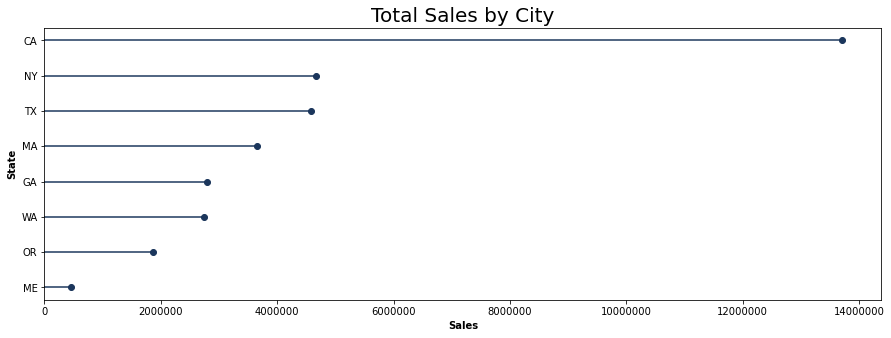

In [53]:
fig, axes = plt.subplots(figsize=(15,5))
axes.hlines(state['State'], xmin=1,
            xmax=state['Sales'], color='#1B365C')

axes.plot(state['Sales'], state['State'], "o", color='#1B365C')
axes.set_xlim(0)
plt.xlabel('Sales', weight="bold")
plt.ylabel('State', weight="bold")
plt.title('Total Sales by City', size=20)
plt.ticklabel_format(style='plain', axis='x')
# plt.xticks(rotation=45)
plt.show()

**Observation:**

> `CA` state has the highest number of sales with `13699562.96`.

## 6. What time should we display adverstisement to maximize likelihood of customer's buying product?

In [54]:
hour_sales = sales_cleaned.groupby('Hour', as_index=False)['Quantity Ordered','Sales'].sum()
hour_sales.head()

,Hour,Quantity Ordered,Sales
0,0,4404,710887.98
1,1,2607,458258.99
2,2,1393,232574.51
3,3,921,144683.04
4,4,931,162281.15


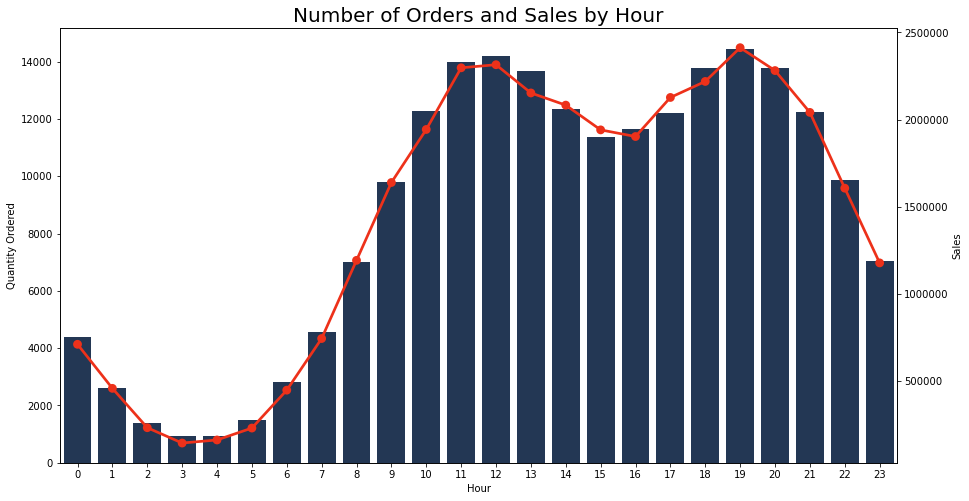

In [55]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Hour', y='Quantity Ordered', data=hour_sales, color='#1B365C')
ax2 = ax.twinx()
ax2 = sns.pointplot(x='Hour', y='Sales', data=hour_sales, color='#ED311A')
ax2.ticklabel_format(style='plain', axis='y')
plt.title('Number of Orders and Sales by Hour', size=20)
plt.show()

**We can draw a constant line in order to find the hours with most orders.**

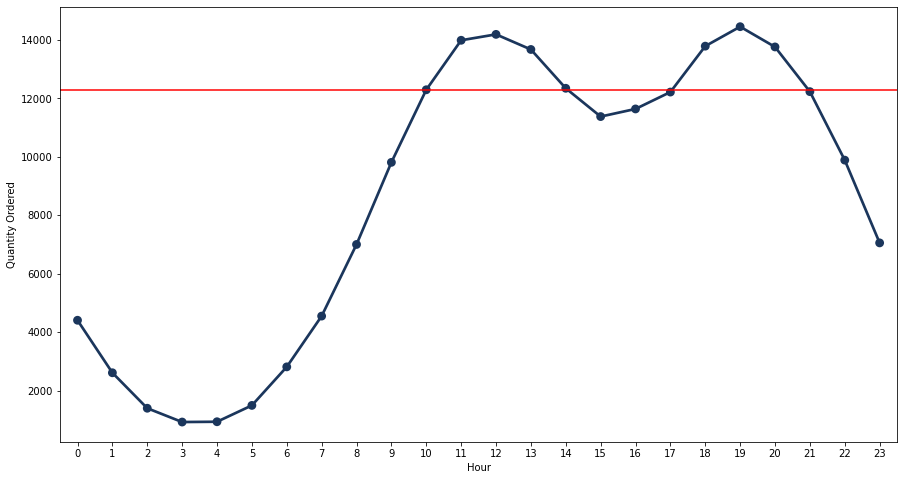

In [56]:
plt.figure(figsize=(15,8))
sns.pointplot(x='Hour', y='Quantity Ordered', data=hour_sales, color='#1B365C')
plt.axhline(y=12300, color='r', linestyle='-')
plt.show()

**Observation:**

> Similarly to `Quantity Ordered` and `Sales`, the `Hour` with most sales are from `10AM` to `14PM` and from `17PM` to `21PM`. 

> Recommendation: In order to maximize a customer buying we can display advertisement from `10AM` to `14PM`. And from `17PM` to `21PM`. Because these hours have the most orders.

## 7. What products are most often sold together?

In [57]:
count = sales_cleaned.groupby('Order ID', as_index=False)['Product'].count()
count[count['Product'] > 1]['Product'].shape

(6876,)

In [58]:
count[count['Product'] > 1]['Product'].value_counts()

2    6523
3     337
4      15
5       1
Name: Product, dtype: int64

**Observation:**

> There should be a total of `6876` observations in `Order ID`. In other words, customers that bought more than 1 product.  

> Most of customer bought 2 products in an order.

In [59]:
from itertools import combinations
from collections import Counter

# Keeping duplicates in Order ID
data = sales_cleaned[sales_cleaned['Order ID'].duplicated(keep=False)]
# Grouped products in column
data['Grouped'] = sales_cleaned.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# Drop duplicates
data = data[['Order ID', 'Grouped']].drop_duplicates()
data.shape

(6876, 2)

In [177]:
# Counter
count = Counter()
# for each product split combinations
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count

Counter({('Google Phone', 'USB-C Charging Cable'): 985,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Google Phone', 'Wired Headphones'): 413,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77,
         ('USB-C Charging Cable', 'Wired Headphones'): 159,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('AA Batteries (4-pack)', 'Bose SoundSport Headphones'): 28,
         ('iPhone', 'Lightning Charging Cable'): 1001,
         ('iPhone', 'Apple Airpods Headphones'): 359,
         ('iPhone', 'Wired Headphones'): 447,
         ('Apple Airpods Headphones', 'Wired Headphones'): 69,
         ('34in Ultrawide Monitor', 'Lightning Charging Cable'): 18,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 34,
         ('USB-C Charging Cable', '20in Monitor'): 10,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 48,
         ('Apple Airpods Headpho

In [169]:
# Most common products sold together
for key, value in count.most_common(30):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1001
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Charging Cable') 50
('AA Batteries (4-pack)', 'AAA Batteries (4-pac

**Observation:**

> These are the top 30 products that are most ofter sold together.

> Note that `iPhone` and `Lightning Charging Cable` sold `1001` orders together.


## 8. What product sold the most? Why do you think it sold the most?

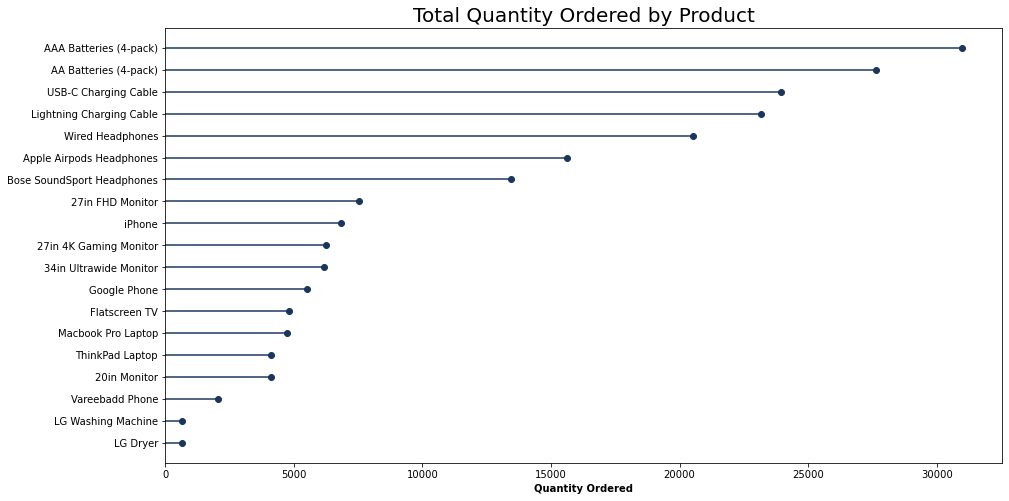

In [167]:
product_sales = sales_cleaned.groupby(['Product','Price Each'], as_index=False)['Sales', 'Quantity Ordered'].sum().sort_values('Quantity Ordered')

fig, axes = plt.subplots(figsize=(15,8))
axes.hlines(product_sales['Product'], xmin=1,
            xmax=product_sales['Quantity Ordered'], color='#1B365C')

axes.plot(product_sales['Quantity Ordered'], product_sales['Product'], "o", color='#1B365C')
axes.set_xlim(0)
plt.xlabel('Quantity Ordered', weight="bold")
plt.ylabel('')
plt.title('Total Quantity Ordered by Product', size=20)
plt.ticklabel_format(style='plain', axis='x')
# plt.xticks(rotation=45)
plt.show()

**Observation:**

> Note that `AAA Batteries (4-pack)` is the product that customers ordered the most. However, let's explore why.


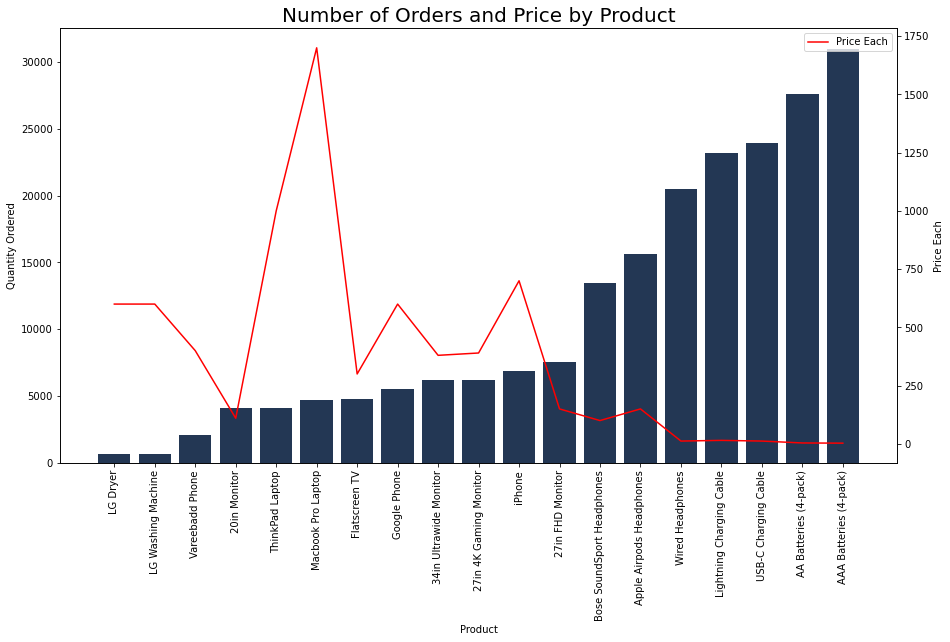

In [157]:
product = product_sales['Product'].values
plt.figure(figsize=(15,8))
ax = sns.barplot(x='Product', y='Quantity Ordered', data=product_sales, color='#1B365C')
ax2 = ax.twinx()
ax2 = sns.lineplot(x='Product', y='Price Each', data=product_sales, color='red', label='Price Each')
ax2.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(product, rotation=90)
plt.title('Number of Orders and Price by Product', size=20)
ax2.legend() 
plt.show()

**Observation:**

> Amazing! `AAA Batteries (4-pack)` has the most orders because of the cheap price. It means that it has more rotation stock.

## 9. However, what product generated the most sales in average?

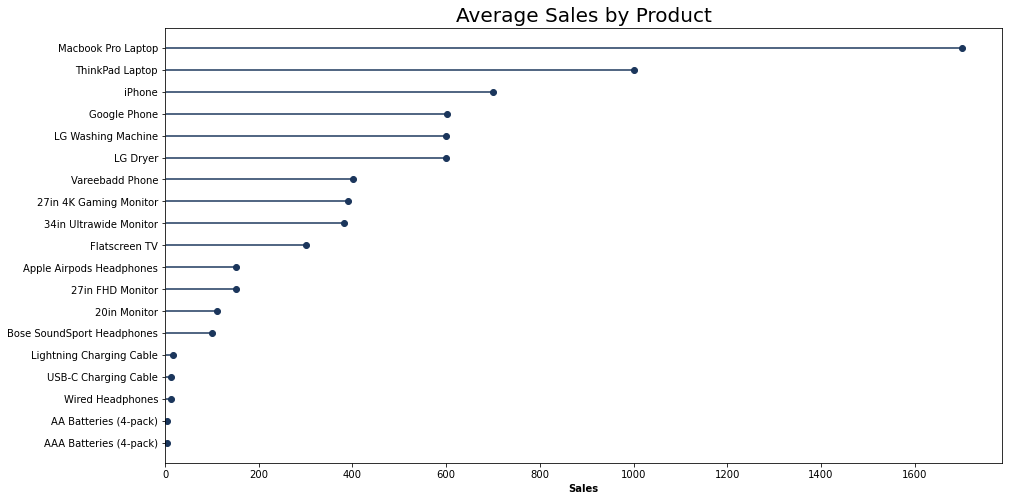

In [165]:
product_avg_sales = sales_cleaned.groupby(['Product'], as_index=False)['Sales'].mean().sort_values('Sales')

fig, axes = plt.subplots(figsize=(15,8))
axes.hlines(product_avg_sales['Product'], xmin=1,
            xmax=product_avg_sales['Sales'], color='#1B365C')

axes.plot(product_avg_sales['Sales'], product_avg_sales['Product'], "o", color='#1B365C')
axes.set_xlim(0)
plt.xlabel('Sales', weight="bold")
plt.ylabel('')
plt.title('Average Sales by Product', size=20)
plt.ticklabel_format(style='plain', axis='x')
# plt.xticks(rotation=45)
plt.show()

**Observation:**

> In average, from total sales `Macbook Pro Laptop` and `ThinkPad Laptop` are the products with most sales. It does not mean that these product are sold the most, but they generate more rotaion in terms of money.

> These products can be a good indicator if the profit is high. However, the data is limited and we do not know the cost of each product.

## 10. How much probability for next people will order a specific product?

**In order to answer this question, we can do a simple probability calculation diving the total orders from a specific product by the total orders.**


This is called `Empirical Probability`: A probability that illustrates the likelihood of an event occurring based on historical data.

See in the next link: [Link (Click Here)](https://corporatefinanceinstitute.com/resources/data-science/empirical-probability/)

In [251]:
# calculating total orders
total_orders = sales_cleaned['Quantity Ordered'].sum()
# Grouping by product
product = sales_cleaned.groupby('Product', as_index=False)['Quantity Ordered'].sum().sort_values('Quantity Ordered', ascending=False)
# Creating a new column for the probabilities
product['Probability'] = ((product['Quantity Ordered'] / total_orders) * 100).round(2)
probability = product[['Product','Probability']]
probability

,Product,Probability
5,AAA Batteries (4-pack),14.84
4,AA Batteries (4-pack),13.23
15,USB-C Charging Cable,11.46
12,Lightning Charging Cable,11.09
17,Wired Headphones,9.83
6,Apple Airpods Headphones,7.49
7,Bose SoundSport Headphones,6.43
2,27in FHD Monitor,3.61
18,iPhone,3.28
1,27in 4K Gaming Monitor,2.99


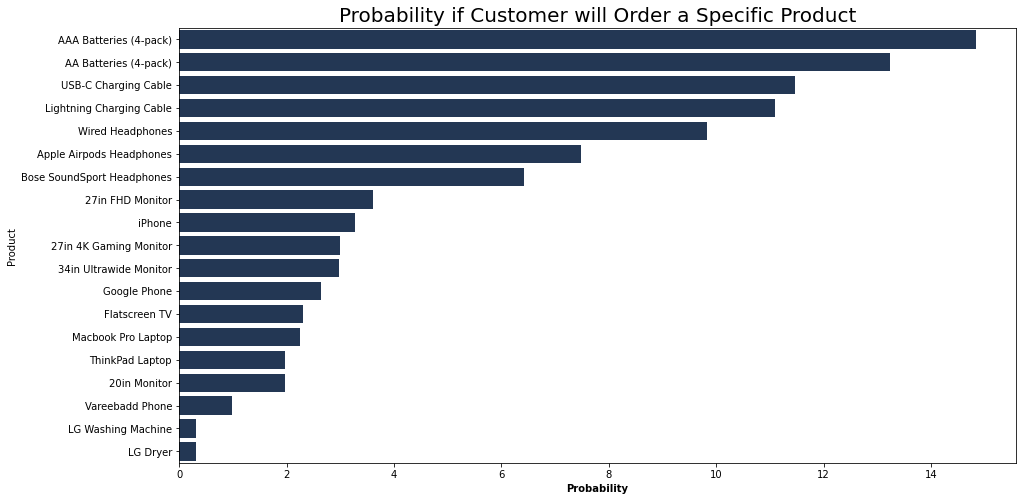

In [258]:
plt.figure(figsize=(15,8))
sns.barplot(x='Probability', y='Product', data=probability, color='#1B365C')
plt.xlabel('Probability', weight="bold", )
plt.title('Probability if Customer will Order a Specific Product', size=20)
plt.show()

**Observation:**

**The probabilities if a customer will buy each product are the next:**

* `AAA Batteries (4-pack)`: 14.84%
* `AA Batteries (4-pack)`: 13.23%
* `USB-C Charging Cable`: 11.46%
* `Lightning Charging Cable`: 11.09%
* `Wired Headphones`: 9.83%
* `Apple Airpods Headphones`: 7.49%
* `Bose SoundSport Headphones`: 6.43%
* `27in FHD Monitor`: 3.61%
* `iPhone`: 3.28%
* `27in 4K Gaming Monitor`: 2.99%
* `34in Ultrawide Monitor`: 2.97%
* `Google Phone`: 2.65%
* `Flatscreen TV`: 2.3%
* `Macbook Pro Laptop`: 2.26%
* `ThinkPad Laptop`: 1.98%
* `20in Monitor`: 1.97%
* `Vareebadd Phone`: 0.99%
* `LG Washing Machine`: 0.32%
* `LG Dryer`: 0.31%

In [296]:
product_sorted = product_sales.sort_values('Price Each', ascending=False)
products_data = pd.merge(product_sorted, probability, on='Product')
products_data

,Product,Price Each,Sales,Quantity Ordered,Probability
0,Macbook Pro Laptop,1700.00,8030800.00,4724,2.26
1,ThinkPad Laptop,999.99,4125958.74,4126,1.98
2,iPhone,700.00,4791500.00,6845,3.28
3,LG Dryer,600.00,387600.00,646,0.31
4,Google Phone,600.00,3316800.00,5528,2.65
5,LG Washing Machine,600.00,399600.00,666,0.32
6,Vareebadd Phone,400.00,826800.00,2067,0.99
7,27in 4K Gaming Monitor,389.99,2432757.62,6238,2.99
8,34in Ultrawide Monitor,379.99,2352898.08,6192,2.97
9,Flatscreen TV,300.00,1443600.00,4812,2.30


-0.6012193492926556


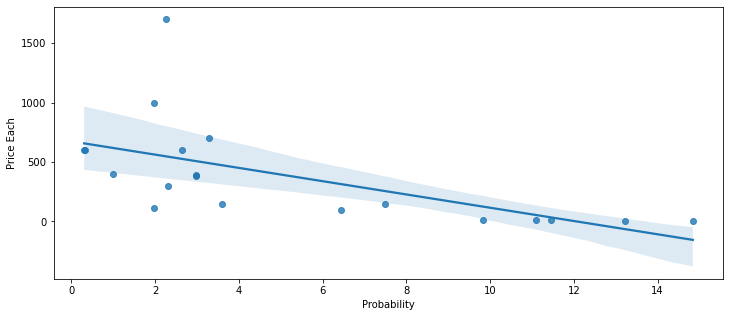

In [297]:
print(products_data['Probability'].corr(products_data['Price Each']))
plt.figure(figsize=(12,5))
sns.regplot(x=products_data['Probability'], y=products_data['Price Each'])
plt.show()

**Observation:**

> There is a moderate negative relationship of `-0.60` between `Price` of a product and the `Probability`. This means, while the product `Price` is low, the `Probability` a product will be ordered tend to increase.

<a id="6"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONS</p>

**After analyzing the sales product data, we can conclude the next points:**

1. In 2019, total sales were `34483365.68`.

2. The fourth quarter `Q4` months were the month with most sales. The worst periods of sales were `Q1` and `Q3`.

3. In general, from `Tuesday` to `Wednesday` average sales tend to increase, but it is not a lot.  

4. The months with the highest average in sales are: `May` and `June`.

5. Most sales are from `10AM` to `14PM` and from `17PM` to `21PM`. 

6. `iPhone` and `Lightning Charging Cable` sold a total of `1001` orders together. See in detail the top 30.

7. `AAA Batteries (4-pack)` has the most orders because of the cheap price. It means that it has more rotation stock.

8. Found the probabilities if a customer will order a speficic products.

9. The probabilities follow a pattern: hile the product `Price` is low, the `Probability` a product will be ordered tend to increase. However, this does not mean causation, there might be other factors that may contribute if a product will be ordered.


<a id="7"></a>
<p style="background-color:#1e3f5a;font-family:Lucida Grande;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">RECOMMENDATIONS</p>


**1. In order to maximize a customer buying, displaying an advertisement from `10AM` to `14PM`. And from `17PM` to `21PM` may increase sales. Because these hours have the most orders.**


**2. Apply an engine of the top 30 products that are most often sold together for customer buying recommendations.**